In [1]:
dt = 0.001 #milisekundy, 1/1000 sekundy
using Plots

In [2]:
# dane
g = 9.81
m = 65
vx₀ = 26.5
α = π / 9
vy₀=26.5
v₀=26.5
# obliczenia
czas = (2 * v₀ * sin(α)) / g
#zasieg = (v₀ ^ 2 * sin(2 * α)) / g
h=80
hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
czas = (2 * v₀ * sin(α)) / g

k=0.5


0.5

In [3]:
delta1=4*v₀^4*sin(α)*sin(α)*cos(α)*cos(α)+8*g*h*v₀^2*cos(α)*cos(α)
zasieg=(-2*v₀^2*sin(α)*cos(α)-sqrt(delta1))/(-2*g)

126.17252359219117

In [4]:
delta2=v₀^2*sin(α)*sin(α)+2*g*h
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)

#t2=(-v₀*sin(α)+sqrt(delta2))/(-g) ujemne wiec do wyjebania

5.066792268075566

In [5]:
function vx_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, czas / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
    end
    return vx
end

function vy_num(v₀, α, k, m, g, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, (czas+t1)/ dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
    end
    return vy
end


function x_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2
    end
    return x
end

function y_num(v₀, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end


y_num (generic function with 1 method)

**z wiaterkiem**

In [6]:
function vx_wind(v₀,vw, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1)/ dt), 1)
    vx[1] = v₀ * cos(α)
    vxw = zeros(floor(Int, (czas+t1)/ dt), 1)
    vxw[1] = v₀ * cos(α)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        vxw[i] = vxw[i-1] -((vx[i-1]+vw)^2/vx[i-1])* dt
    end
    return vxw
end

vx_wind (generic function with 1 method)

In [7]:
function vx_wind2(v₀,vw, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1)/ dt), 1)
    vx[1] = v₀ * cos(α)
   
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * ((vx[i-1]+vw)^2/vx[i-1])* dt
        
    end
    return vx
end

vx_wind2 (generic function with 1 method)

In [8]:
function vy_wind(v₀, vw, α, k, m, g, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    vyw = zeros(floor(Int, (czas+t1) / dt), 1)
    vyw[1] = v₀ * sin(α)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        vyw[i] = vyw[i-1] - ((vy[i-1]+vw)^2/vy[i-1]) * dt
        
    end
    return vy
end

vy_wind (generic function with 1 method)

In [9]:
function vy_wind2(v₀, vw, α, k, m, g, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
   
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * ((vy[i-1]+vw)^2/vy[i-1]) * dt
      
        
    end
    return vy
end

vy_wind2 (generic function with 1 method)

In [10]:
function x_wind2(v₀,vw, α, k, m, dt)
    
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    vx = zeros(floor(Int, (czas+t1)/ dt), 1)
    vx[1] = v₀ * cos(α)
   
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * ((vx[i-1]+vw)^2/vx[i-1])* dt
        x[i] = x[i-1] +vx[i-1] * dt - (1 / 2) * (k / m) * ((vx[i-1]+vw)^2/vx[i-1])* dt ^ 2
    end
    return x
end 

x_wind2 (generic function with 1 method)

In [11]:
x_wind2(v₀,vw, α, k, m, dt)

LoadError: [91mUndefVarError: vw not defined[39m

In [12]:
function y_wind(v₀,vw, α, k, m,g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    vyw = zeros(floor(Int, (czas+t1) / dt), 1)
    vyw[1] = v₀ * sin(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * ((vy[i-1]+vw)^2/vy[i-1]) * dt
        
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) *((vy[i-1]+vw)^2/vy[i-1]) * dt ^ 2
    end
    return y
end 

y_wind (generic function with 1 method)

In [13]:
y_wind2(v₀,vw, α, k, m,g,h, dt)

LoadError: [91mUndefVarError: y_wind2 not defined[39m

In [14]:
function y_wind2(v₀,vw, α, k, m,g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
   
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) *((vy[i-1]+vw)^2/vy[i-1]) * dt
       
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * ((vy[i-1]+vw)^2/vy[i-1]) * dt ^ 2
    end
    return y
end 

y_wind2 (generic function with 1 method)

In [15]:
vw=2
vx_wind2(v₀,vw, α, k, m, dt)

6914×1 Array{Float64,2}:
 24.901854450826573
 24.901630893249205
 24.901407337380416
 24.901183783220194
 24.900960230768526
 24.9007366800254
 24.900513130990802
 24.90028958366472
 24.900066038047136
 24.899842494138042
 24.899618951937423
 24.899395411445266
 24.899171872661555
  ⋮
 23.39883372151271
 23.39862164626338
 23.39840957263348
 23.398197500623
 23.39798543023192
 23.397773361460235
 23.397561294307927
 23.39734922877499
 23.3971371648614
 23.396925102567156
 23.39671304189224
 23.396500982836642

In [16]:
vw=2
vx_wind(v₀,vw, α, k, m, dt)

6914×1 Array{Float64,2}:
   24.901854450826573
   24.87279196576858
   24.843729671027685
   24.814667566602402
   24.785605652491252
   24.75654392869275
   24.727482395205413
   24.698421052027758
   24.6693598991583
   24.640298936595563
   24.611238164338058
   24.5821775823843
   24.553117190732813
    ⋮
 -171.2351274805259
 -171.26291110620593
 -171.29069455154098
 -171.3184778165325
 -171.34626090118184
 -171.37404380549043
 -171.4018265294597
 -171.42960907309103
 -171.45739143638585
 -171.48517361934555
 -171.51295562197154
 -171.54073744426523

In [17]:
h=80
czas_opor = 0
czas_opor_end=0
for i in (1 : floor(Int, (czas+t1) / dt))
    if abs(y_wnum(v₀,α, k, m, g, h,dt)[i]) < 0.007
        czas_opor = i
       
    end
end
czas_opor
#brak czas_opor_wiatr

LoadError: [91mUndefVarError: y_wnum not defined[39m

In [18]:
h=80
czas_opor_wiatr = 0
czas_opor_end=0
for i in (1 : floor(Int, (czas+t1) / dt))
    if abs(y_wind2(v₀, vw,α, k, m, g, h,dt)[i]) < 0.007
        czas_opor_wiatr = i
       
    end
end
czas_opor_wiatr

5077

In [19]:
hₘ_opor = maximum(y_num(v₀, α, k, m, g,h, dt))

84.16718482058853

In [20]:
hₘ_opor_wiatr = maximum(y_wind2(v₀,vw, α, k, m, g,h, dt))

84.15137409829477

In [21]:
zasieg_opor = x_num(v₀, α, k, m, dt)[czas_opor]

LoadError: [91mBoundsError: attempt to access 6914×1 Array{Float64,2} at index [0][39m

In [22]:
zasieg_opor_wiatr = x_wind2(v₀,vw, α, k, m, dt)[czas_opor_wiatr]

123.55861470897212

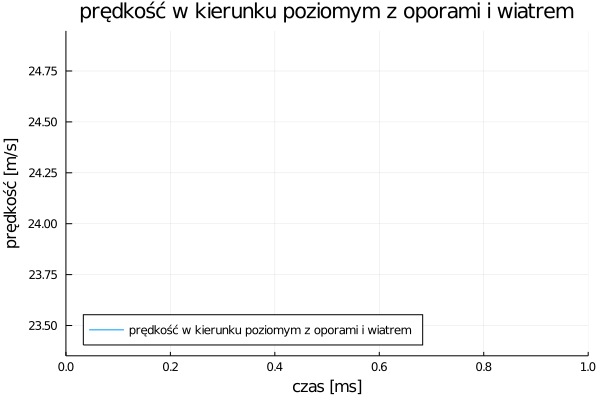

In [23]:
plot(vx_wind2(v₀,vw, α, k, m, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym z oporami i wiatrem",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku poziomym z oporami i wiatrem")

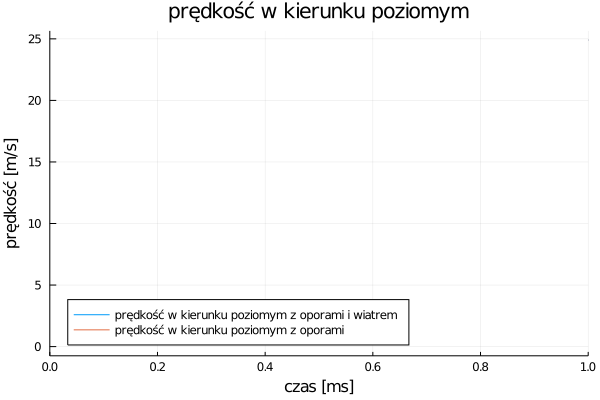

In [24]:
plot!(vx_num(v₀,α, k, m, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku poziomym")

In [25]:
vy_wind(v₀, vw, α, k, m, g, dt)

6914×1 Array{Float64,2}:
   9.063533798130221
   9.053654078639466
   9.043774435146554
   9.033894867650899
   9.024015376151917
   9.014135960649023
   9.004256621141634
   8.994377357629164
   8.984498170111028
   8.974619058586642
   8.964740023055422
   8.954861063516782
   8.94498217997014
   ⋮
 -57.34797604597191
 -57.35734490769464
 -57.3667136973492
 -57.37608241493614
 -57.38545106045603
 -57.39481963390941
 -57.40418813529684
 -57.41355656461888
 -57.422924921876074
 -57.43229320706899
 -57.441661420198166
 -57.451029561264164

In [26]:
vy_wind2(v₀, vw, α, k, m, g, dt)

6914×1 Array{Float64,2}:
   9.063533798130221
   9.053619914570497
   9.043706103554003
   9.03379236507206
   9.02387869911596
   9.013965105676968
   9.004051584746325
   8.994138136315241
   8.984224760374902
   8.974311456916464
   8.96439822593106
   8.954485067409792
   8.944571981343735
   ⋮
 -57.544595656858206
 -57.553993240650804
 -57.5633907522416
 -57.572788191631126
 -57.5821855588199
 -57.59158285380846
 -57.600980076597324
 -57.61037722718702
 -57.61977430557808
 -57.629171311771024
 -57.63856824576638
 -57.64796510756467

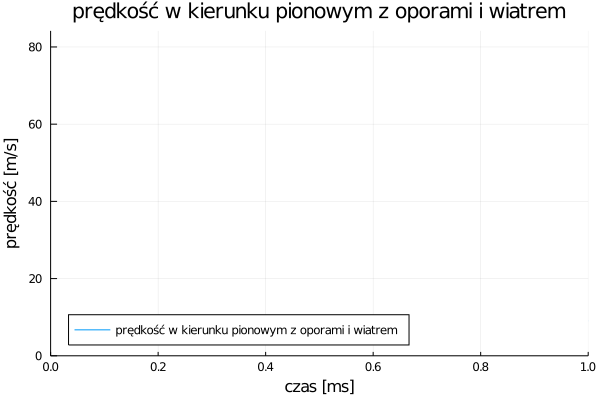

In [27]:
plot(vy_wind(v₀,vw, α, k, m, g,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku pionowym z oporami i wiatrem",
    xlim = (0, czas_opor),
    ylim=(0,hₘ_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku pionowym z oporami i wiatrem")

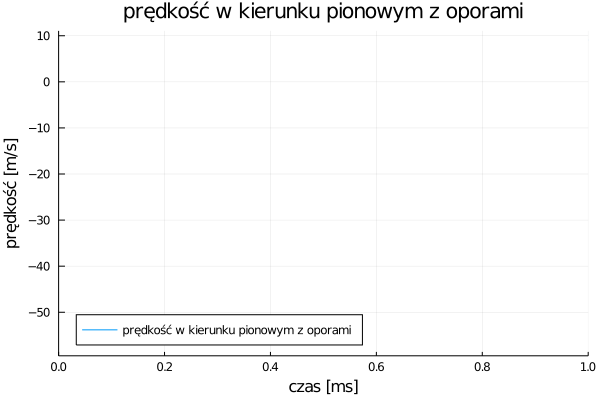

In [28]:
plot(vy_num(v₀, α, k, m, g,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku pionowym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku pionowym z oporami")

In [29]:
x_wind2(v₀,vw, α, k, m, dt)

6914×1 Array{Float64,2}:
   0.0
   0.024901742672037888
   0.0498032617873527
   0.07470455734765301
   0.09960562935464737
   0.12450647781004433
   0.1494071027155524
   0.17430750407288018
   0.1992076818837361
   0.2241076361498287
   0.24900736687286643
   0.27390687405455777
   0.2988061576966112
   ⋮
 166.64009428489035
 166.66349301257424
 166.68689152818368
 166.7102898317203
 166.73368792318573
 166.75708580258157
 166.78048346990946
 166.803880925171
 166.82727816836783
 166.85067519950155
 166.87407201857377
 166.89746862558616

In [30]:
plot(x_wind(v₀,vw, α, k, m,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "ruch w kierunku poziomym z oporami i wiatrem",
    xlim = (0, 6000),
    ylim = (0, 500),
    legend = :bottomright,
    title = "ruch w kierunku poziomym z oporami i wiatrem")

LoadError: [91mUndefVarError: x_wind not defined[39m

In [31]:
y_wind(v₀,vw, α, k, m,g,h, dt)

6914×1 Array{Float64,2}:
  80.0
  80.00905857685635
  80.01810723986542
  80.02714598909974
  80.03617482463183
  80.04519374653422
  80.05420275487944
  80.06320184973998
  80.07219103118832
  80.08117029929697
  80.0901396541384
  80.09909909578506
  80.10804862430943
   ⋮
 -89.3370958794005
 -89.39464517384926
 -89.45220386584569
 -89.50977195531762
 -89.56734944219285
 -89.62493632639915
 -89.68253260786435
 -89.74013828651624
 -89.79775336228262
 -89.85537783509129
 -89.91301170487006
 -89.97065497154672

In [32]:
plot(y_wind(v₀,vw, α, k, m,g,h,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "ruch w kierunku pionowym z oporami i wiatrem",
    xlim = (0, czas_opor),
    ylim = (0, zasieg_opor),
    legend = :bottomleft,
    title = "ruch w kierunku pionowym z oporami i wiatrem")

LoadError: [91mUndefVarError: zasieg_opor not defined[39m

In [33]:
plot(y_wind2(v₀,vw, α, k, m,g,h,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "ruch w kierunku pionowym z oporami i wiatrem",
    xlim = (0, czas_opor),
    ylim = (0, zasieg_opor),
    legend = :bottomleft,
    title = "ruch w kierunku pionowym z oporami i wiatrem")

LoadError: [91mUndefVarError: zasieg_opor not defined[39m

In [34]:

plot(x_wind(v₀,vw, α, k, m, dt), y_wind(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")



LoadError: [91mUndefVarError: x_wind not defined[39m

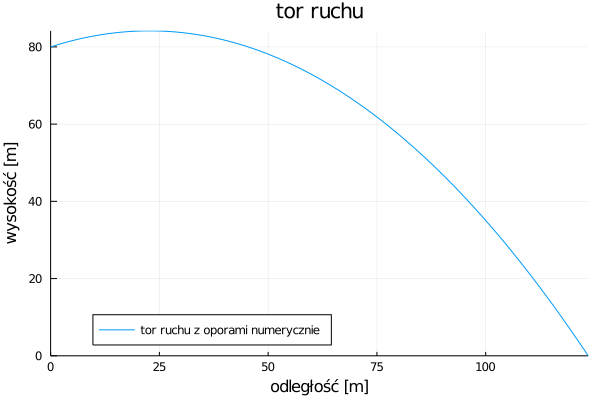

In [35]:
vw=2
plot(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    legend = :bottom,
    title = "tor ruchu")

In [36]:
plot!(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie bez wiatru",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

LoadError: [91mUndefVarError: zasieg_opor not defined[39m

In [37]:
function v_wind2(v₀, vw, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)

    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
   
    v = zeros(floor(Int, (czas+t1) / dt), 1)
    v[1] = sqrt(vx[1]^2+vy[1]^2)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * ((vy[i-1]+vw)^2/vy[i-1])* dt
        
        vx[i] = vx[i-1] - (k / m) * ((vx[i-1]+vw)^2/vx[i-1])* dt
        
        v[i]=sqrt(vx[i-1]^2+vy[i-1]^2)
        
    end
    return v
end

v_wind2 (generic function with 1 method)

In [38]:
v_wind(v₀, vw, α, k, m, g,h, dt)


LoadError: [91mUndefVarError: v_wind not defined[39m

In [39]:
plot(x_wind2(v₀, vw, α, k, m, dt),v_wind2(v₀, vw, α, k, m, g,h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")


LoadError: [91mUndefVarError: zasieg_opor not defined[39m

In [40]:
plot(x_wind2(v₀, vw, α, k, m, dt),vx_wind2(v₀, vw, α, k, m, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

LoadError: [91mUndefVarError: zasieg_opor not defined[39m